# Métricas de modelos supervisados de regresión

En el contexto de la regresión tenemos multiples tipos de metricas, las cuales no suelen ser tan interpretables a simple vista como en problemas de clasificación, donde incluso la libreria de facto para ml --rskit-learn-- nos proporciona un claro reporte de clasificación bajo la funcion ClassificationReport del modulo metrics, dicho reporte incluye de manera muy clara las principales metricas para ese tipo de problema supervisado. En este notebook, se mensionaran las diferentes metricas para regresión, su forma de funcionar, sus ventajas, desventajas, casos de usos tipicos y formas de interpretarlas.

Por ultimo, tambien se creara una función que nos genere un reporte inspirado en el reporte de clasificación, el cual contenga de manera clara, las principales metricas para este subtipo de problemas supervisados.

## Conjunto de datos ejemplo:  Boston Housing

Para ilustrar el uso de estas metricas en la etapa de evaluacion, utilizaremos uno de los dataset mas limpios y facilmente interpretables, que nos permitan pasar rapidamente a la etapa de modelado, y por consiguiente a la etapa de evaluación.

### importamos librerías

In [47]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Robustrsaler
from sklearn.metrics import r2_rsore, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

ImportError: cannot import name 'Robustrsaler' from 'sklearn.preprocessing' (/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/__init__.py)

In [ ]:
import pandas as pd                      
import numpy as np          

In [ ]:
import matplotlib.pyplot as plt           
import seaborn as sns

### Importamos / leemos el conjunto de datos

**Dersripción de variables**

| Columna (feature) | ¿Qué mide? | Tipo / Unidad |
|-------------------|------------|---------------|
| **CRIM**          | Tasa de criminalidad per cápita por barrio | Numérico (crímenes per cápita) |
| **ZN**            | Proporción de suelo residencial con lotes > 25 000 ft² | Numérico (% de la zona) |
| **INDUS**         | Porcentaje de acres destinados a uso no-residencial (industrial) | Numérico (%) |
| **CHAS**          | Variable ficticia del río Charles (1 = el barrio bordea el río; 0 = no) | Binaria (0/1) |
| **NOX**           | Concentración de óxidos de nitrógeno (partes por 10 millones) | Numérico (ppm × 10⁻²) |
| **RM**            | Promedio de habitaciones por vivienda | Numérico (# habitaciones) |
| **AGE**           | Proporción de viviendas ocupadas construidas antes de 1940 | Numérico (%) |
| **DIS**           | Distancias ponderadas a 5 centros de empleo en Boston | Numérico (índice de distancia) |
| **RAD**           | Índice de accesibilidad a autopistas radiales | Numérico (1–24) |
| **TAX**           | Tipo impositivo sobre la propiedad por \$10 000 | Numérico (USD) |
| **PTRATIO**       | Ratio alumno-profesor por distrito ersolar | Numérico |
| **B**             | 1000 × (Bk – 0.63)² donde Bk es la proporción de población afroamericana por barrio | Numérico |
| **LSTAT**         | % de población con estatus socioeconómico bajo | Numérico (%) |
| **MEDV** *(target)* | Valor mediano de las viviendas ocupadas por sus dueños | Numérico (miles de USD) |

**Origen**

* **Fuente original:** Harrison, D. & Rubinfeld, D. L. (1978). *Hedonic prices and the demand for clean air*. *Journal of Environmental Economics & Management*.  
* **Compilación para IA:** Publicado en la **UCI Machine Learning Repository** y replicado en **OpenML** (ID = `boston`).  
* **Uso didáctico:** Incluido históricamente en rsikit-learn para tareas de regresión; actualmente se accede mediante `fetch_openml()` por cuestiones de licenciamiento y ética de datos, así como tambien por recursos python.

> **Nota docente:** El dataset es útil para introducir técnicas de regresión, interpretación de coeficientes y análisis de variables dentro del mundo real

In [ ]:
boston_data = fetch_openml(name='boston', version=1)

In [ ]:
df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)    # Convierte los datos en un DataFrame con nombres de columnas

In [ ]:
df['target'] = boston_data.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Breve eda

#### Correlación lineal

In [ ]:
# Bloque: Mapa de correlaciones con mársara del triángulo superior
df_corr = df.corr().abs()

##### Correlación con la target

In [ ]:
target_corr = df_corr[['target']] 
target_corr_abs_sort = target_corr.abs().sort_values(by='target', arsending=False)

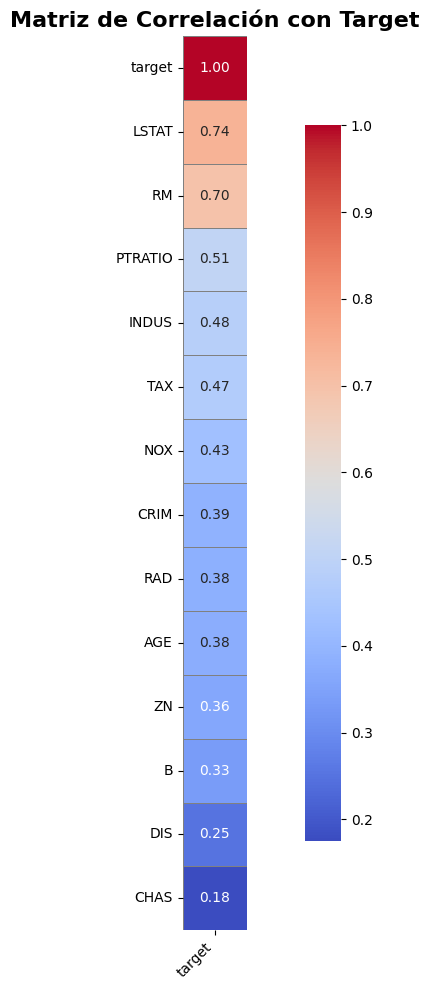

In [ ]:
plt.figure(figsize=(12, 10))  # Ajuste de tamaño más equilibrado

sns.heatmap(
    target_corr_abs_sort,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.title('Matriz de Correlación con Target', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Correlación entre features

In [ ]:
mask = np.triu(df_corr)

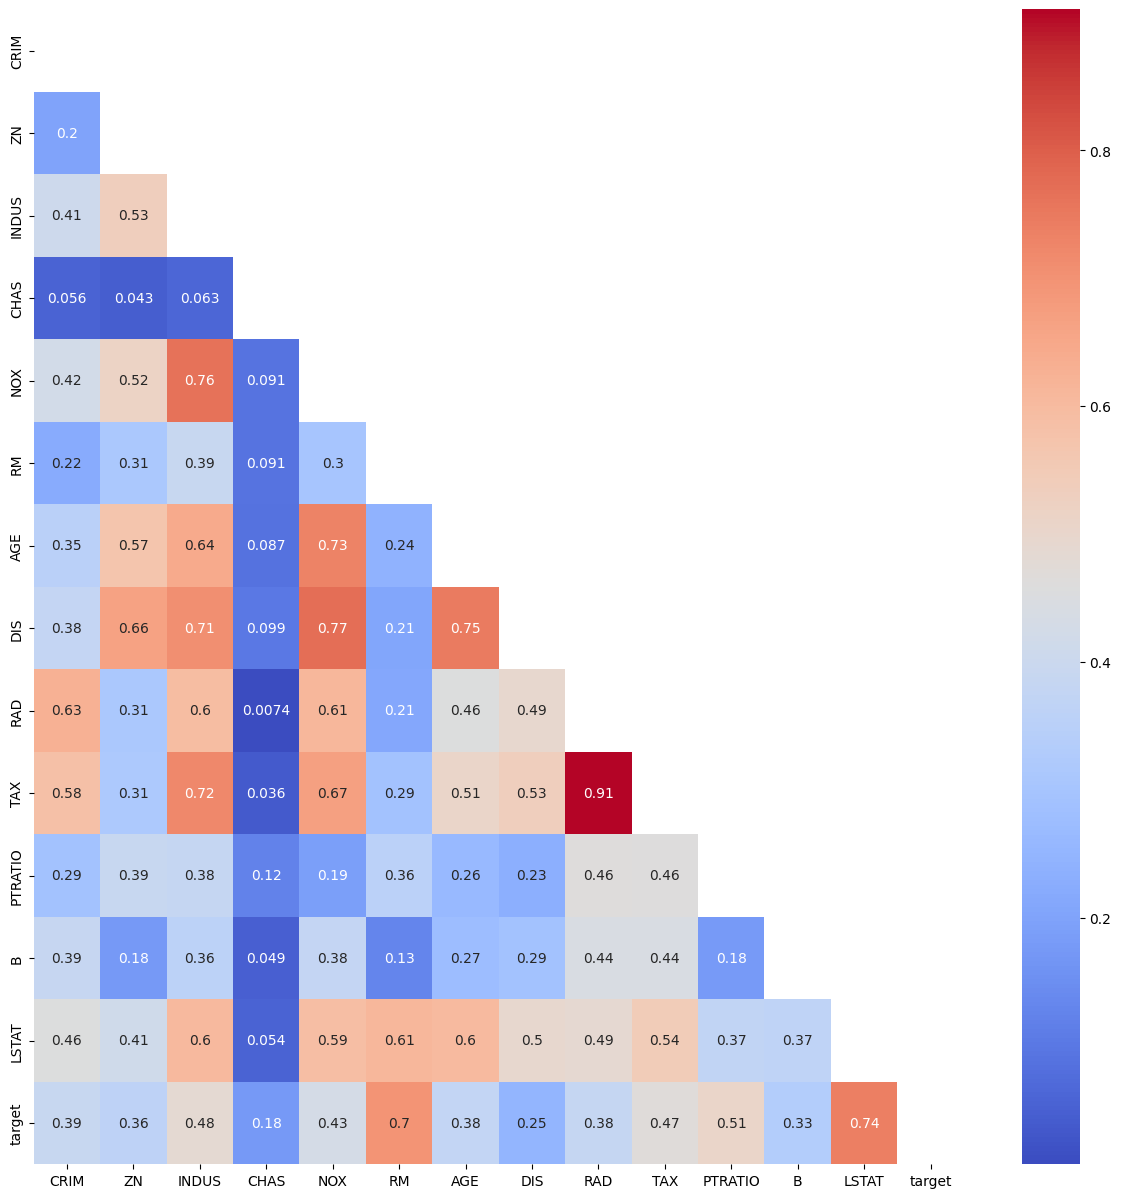

In [ ]:
plt.figure(figsize=(15, 15))                     # Inicializa la figura y el eje con un tamaño de 10×10 pulgadas

sns.heatmap(                                               # Dibuja el mapa de calor de las correlaciones
    df_corr,                                             #   ▶️ matriz de correlaciones
    mask=mask,                                             #   ▶️ aplica la mársara para mostrar solo el triángulo inferior
    cmap='coolwarm',                                       #   ▶️ usa la paleta de colores definida                                         #   ▶️ celdas cuadradas para una distribución uniforme
    annot=True                                             #   ▶️ muestra el valor numérico de cada correlación
)

plt.show()

#### Distribución de columna target

In [ ]:
df['target'].dersribe()

,target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [ ]:
target_mean = np.mean(df['target'])
target_median = np.median(df['target'])

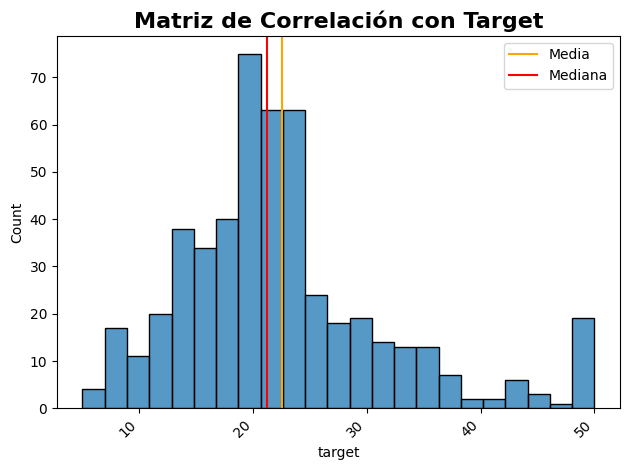

In [ ]:
plt.title('Matriz de Correlación con Target', fontsize=16, fontweight='bold')
sns.histplot(data=df, x="target")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.axvline(target_mean, color='orange', label='Media')
plt.axvline(target_median, color='red', label='Mediana')
plt.legend()
plt.tight_layout()
plt.show()

### Breve preprocesamiento

#### Reducción de dimensionalidad (manual)

In [ ]:
target_corr_abs_sort_top_features = target_corr_abs_sort.index[1:5]
target_corr_abs_sort_top_features

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS'], dtype='object')

In [ ]:
selected = set(target_corr_abs_sort_top_features)

for i in range(len(df_corr.columns)):
    for j in range(i):
        f1 = df_corr.columns[i]
        f2 = df_corr.columns[j]

        try:
            if df_corr.iloc[i, j] > 0.70:
                if target_corr_abs_sort[f1] > target_corr_abs_sort[f2]:
                    selected.dirsard(f2)
                else:
                    selected.dirsard(f1)
        except:
            pass

#### Tratamiento de outliers sobre target

In [ ]:
help(np.clip)

Help on _ArrayFunctionDispatcher in module numpy:

clip(a, a_min, a_max, out=None, **kwargs)
    Clip (limit) the values in an array.

    Given an interval, values outside the interval are clipped to
    the interval edges.  For example, if an interval of ``[0, 1]``
    is specified, values smaller than 0 become 0, and values larger
    than 1 become 1.

    Equivalent to but faster than ``np.minimum(a_max, np.maximum(a, a_min))``.

    No check is performed to ensure ``a_min < a_max``.

    Parameters
    ----------
    a : array_like
        Array containing elements to clip.
    a_min, a_max : array_like or None
        Minimum and maximum value. If ``None``, clipping is not performed on
        the corresponding edge. Only one of `a_min` and `a_max` may be
        ``None``. Both are broadcast against `a`.
    out : ndarray, optional
        The results will be placed in this array. It may be the input
        array for in-place clipping.  `out` must be of the right shape
        t

In [ ]:
p_01 = df['target'].quantile(0.01)
p_99 = df['target'].quantile(0.99)

In [ ]:
df['target'] = np.clip(df['target'], p_01, p_99)

#### Particion de datos

In [ ]:
X = df.drop(["target"], axis=1)   # Selecciona TODAS las columnas excepto 'target' ⇒ variables predictoras (features)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
y = df["target"].copy()           # Copia la columna objetivo ⇒ valores a predecir (evitamos modificaciones accidentales)
y

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Divide el dataset: 80 % para entrenamiento y 20 % para prueba
# - test_size=0.2   → 20 % de las filas se reservan para evaluar el modelo
# - random_state=42 → fija la “semilla” para que el split sea siempre igual (reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)  # ← dimensiones de las features de entrenamiento
print(X_test.shape)   # ← dimensiones de las features de prueba
print(y_train.shape)  # ← longitud del vector objetivo de entrenamiento
print(y_test.shape)   # ← longitud del vector objetivo de prueba

(404, 13)
(102, 13)
(404,)
(102,)


#### Ersalamiento 

In [ ]:
rs = Robustrsaler()

In [ ]:
rs.fit(X_train)

StandardScaler()

In [ ]:
X_train = pd.DataFrame(data=rs.transform(X_train), columns=X_train.columns, index = X_train.index)
X_test = pd.DataFrame(data=rs.transform(X_test), columns=X_test.columns, index = X_test.index)

### Modelado

#### Instancia

In [48]:
lr_model = LinearRegression()

#### Entrenamiento

In [49]:
lr_model.fit(X_train, y_train)

LinearRegression()

#### Predicciones

In [50]:
y_train_pred = lr_model.predict(X_train)

In [51]:
y_test_pred = lr_model.predict(X_test)

#### Evaluación

Aunque existen múltiples formas de clasificar métricas de regresión, un marco pragmático debe considerar al menos cuatro dimensiones: (1) el propósito del uso (optimización vs evaluación / reporting), (2) su estabilidad numerica, (3) la estructura y simetría del error que modela, y (4) los supuestos estructurales sobre los datos.

Analizar estas dimensiones en conjunto permite seleccionar métricas coherentes con la naturaleza de los datos identificada durante el EDA y con el objetivo del problema.

Al mismo tiempo para poder tener claros estos criterios, es necesario primero definirlos brevemente, y luego desarrollarlos sobre cada una de las metricas principales.



## Criterio basado rol o uso en el ciclo de modelado

1. **Optimización (Loss / entrenamiento):**  Propósito principal es guiar los parámetros del modelo hacia predicciones más precisas, priorizando eficiencia computacional y estabilidad numérica.

1. **Evaluación / Reporting (Metrics / scoring):** El propósito principal es medir el desempeño del modelo y comunicar resultados de manera clara, priorizando interpretabilidad y comparabilidad, incluso si no son diferenciables.

La métrica que se optimiza durante el entrenamiento no siempre coincide con la métrica utilizada para evaluación o reporting.  
Por ejemplo, un modelo puede entrenarse con **MSE** pero evaluarse con **MAE** para obtener una medida más interpretable.

⸻

Si bien ambos grupos requieren estabilidad numérica en el dominio de los datos para asegurar robustez en el cálculo de la métrica, en las métricas de optimización este requisito suele ser más crítico debido a su impacto directo en la convergencia del entrenamiento.  

Hay ciertas particularidades de requisitos para cada subgrupo:

## Optimización (Loss / entrenamiento)

- Diferenciables o sub-diferenciables, para permitir optimización eficiente.  
- Suaves y continuas, para que los gradientes sean estables durante el entrenamiento, especialmente si se utiliza algún algoritmo iterativo y de retropropagación como el descenso por gradiente.

## Evaluación / Reporting (Metrics / scoring)

- Interpretables y comprensibles, útiles para análisis y decisiones de negocio.  
- Comparables entre modelos y datasets, considerando unidades y escalas.

# Estabilidad numérica y condicionamiento del problema

La estabilidad numérica de una métrica depende de **dos dimensiones complementarias**:

1. El **condicionamiento matemático** de la función, que determina la sensibilidad intrínseca de la función matematica para el conjunto de datos.
2. La **estabilidad computacional** de su implementación, que determina qué tan fielmente el algoritmo respeta esa sensibilidad bajo precisión finita.

Una métrica adecuadamente diseñada debe:

- Estar **bien condicionada** en el dominio relevante de los datos.
- Poder calcularse de forma **robusta bajo aritmética de precisión finita**.

## Condicionamiento matemático

El condicionamiento es una **propiedad intrínseca de la función**, no del algoritmo que la calcula.

Mide qué tan sensible es la salida frente a pequeñas perturbaciones en la entrada.

Una función está **bien condicionada** si pequeños errores relativos en la entrada producen errores relativos pequeños en la salida.

|f(x+\varepsilon)-f(x)| \text{ es pequeño si } |\varepsilon| \text{ es pequeño}

Para una función escalar diferenciable, el **número de condición relativo** es:

\[
\kappa(x) = \left| \frac{x f'(x)}{f(x)} \right|
\]

- Si \( \kappa \) es pequeño → el problema está **bien condicionado**.
- Si \( \kappa \) es grande → el problema está **mal condicionado** y amplifica perturbaciones.

En el contexto de métricas de regresión, un mal condicionamiento puede aparecer cuando existen **divisiones por valores cercanos a cero** (por ejemplo, en MAPE).

## Estabilidad computacional

Aun cuando una función esté razonablemente bien condicionada, su implementación puede introducir inestabilidad.

Una métrica es **computacionalmente estable** cuando:

- No amplifica errores de redondeo.
- Evita *overflow* y *underflow*.
- Reduce el riesgo de **cancelación catastrófica**.
- Evita operaciones numéricamente peligrosas (como divisiones por valores muy pequeños o exponenciales de gran magnitud).

En la práctica, esto implica:

- Utilizar formulaciones algebraicamente estables.
- Emplear funciones numéricas diseñadas para precisión finita.

# Supuestos estructurales en las métricas de regresión

Toda métrica de regresión está construida bajo ciertas condiciones implícitas o explícitas sobre los datos, tales como:

- Distribución del error. Algunas métricas asumen que los errores siguen una distribución específica (por ejemplo, simétrica o con varianza finita), lo que condiciona cómo se agregan y ponderan los errores. Si esta suposición no se cumple, la métrica puede distorsionar la evaluación del modelo y perder interpretabilidad.

- Escala del target. La magnitud de los valores de salida afecta directamente el cálculo de ciertas métricas. Si la métrica asume una escala particular y los datos están en otra, los errores pueden parecer desproporcionadamente grandes o pequeños, dificultando la comparación y la interpretación.

- Estructura del error (aditiva o multiplicativa). Algunas métricas consideran que los errores se suman linealmente sobre el valor real, mientras que otras asumen que los errores se escalan proporcionalmente al valor. Si esta estructura no coincide con la realidad, la métrica puede sobreestimar o subestimar el impacto de los errores.

- Dominio permitido de los valores (positivos, no nulos, acotados, etc.). Muchas métricas requieren que los datos se encuentren dentro de ciertos rangos o que no incluyan valores prohibidos, como ceros o negativos. Si los datos violan estas restricciones, pueden producirse operaciones indefinidas, resultados explosivos o errores computacionales.

⸻

## Consecuencias de violar los supuestos

Si los datos no cumplen esos supuestos, pueden surgir dos tipos de problemas:

A. Problemas de estabilidad numérica

Los supuestos delimitan el dominio donde la métrica es válida y bien condicionada.
Cuando se violan:
	* Pueden aparecer operaciones indefinidas.
- Puede producirse amplificación excesiva de valores. Cuando los datos violan los supuestos de la métrica, errores o valores extremos pueden multiplicarse de manera desproporcionada dentro del cálculo, generando resultados numéricamente inestables y poco confiables, aunque la fórmula sea correcta desde el punto de vista matemático.

- El problema puede volverse mal condicionado en ciertas regiones. Si los supuestos no se cumplen, pequeñas variaciones en los datos pueden generar grandes cambios en el valor de la métrica, lo que refleja un mal condicionamiento del problema y reduce la precisión de los cálculos bajo aritmética de punto flotante.

Esto compromete la confiabilidad del cálculo.

⸻

B. Problemas de interpretación

Independientemente de la estabilidad computacional, si los supuestos no se cumplen:
- El valor calculado no refleja correctamente el desempeño real del modelo. Esto ocurre cuando la forma en que la métrica cuantifica el error no coincide con la naturaleza del problema. El número obtenido puede ser matemáticamente correcto, pero no representar adecuadamente el impacto real de las predicciones en el contexto donde el modelo será utilizado.

- Puede exagerar o minimizar ciertos tipos de error. toda métrica incorpora una forma específica de ponderar los errores. Si esa ponderación no está alineada con lo que realmente importa en el problema, algunos errores pueden recibir un peso excesivo o insuficiente, generando una evaluación distorsionada del desempeño.

Aquí el problema no es de cálculo, sino de significado estadístico.

## Relación entre estabilidad e interpretación

La estabilidad numérica afecta la confiabilidad del valor calculado.
Los supuestos afectan el significado de ese valor.

Cuando ambos fallan simultáneamente, la métrica puede volverse tanto computacionalmente inestable como conceptualmente engañosa. Sin embargo, la pérdida de interpretabilidad no se deriva exclusivamente de la inestabilidad numérica, sino principalmente de la ruptura de los supuestos que fundamentan la métrica.

# Criterio de Simetría del Error

Este criterio se relaciona con los supuestos de cada metrica, y clasifica las métricas según cómo ponderan los errores positivos y negativos o, en general, las desviaciones respecto a la predicción. La simetría del error determina si la métrica trata los errores de la misma manera independientemente de su signo o magnitud relativa.


Tipos de simetría

1.	Simetría absoluta
* La métrica penaliza por igual errores positivos y negativos de la misma magnitud.
* Ejemplo conceptual: error de ±100 tiene el mismo efecto en la métrica.
2.	Simetría relativa / porcentual
* La penalización depende de la relación entre el error y el valor real o esperado.
* Ejemplo conceptual: un error de 10 sobre un valor 100 es equivalente a un error de 1 sobre un valor 10.
3.	Asimetría dirigida / ponderada
* La métrica penaliza de manera diferente errores positivos y negativos.
* Ejemplo conceptual: subestimaciones pueden penalizarse más que sobreestimaciones (o viceversa).

##### Tabla resumen de desición para funciones / metricas  de optimización interna del modelo:

Deben ser (idealmente) diferenciables.

| Métrica | Estabilidad numerica y Sensibilidad a Outliers | Simetría del Error | Supuestos |
|----------|-------------------------|--------------------|------------|
| **MSE** | Alta (penalización cuadrática) | Simétrica | Errores ~ normales, varianza constante |
| **RMSE** | Alta | Simétrica | Igual que MSE (es transformación) |
| **RMSLE** | Moderada–Alta (en escala log) | Simétrica en log | Datos positivos, crecimiento exponencial |
| **Huber Loss** | Moderada (cuadrática → lineal) | Simétrica | Parámetro \( \delta \) bien calibrado |
| **Log-Cosh Loss** | Moderada | Simétrica | No requiere supuestos fuertes |
| **Quantile Loss (Pinball)** | Baja–controlada | Asimétrica (según \( \tau \)) | Interesa estimar cuantiles |
| **MAE (subgradiente)** | Moderada | Simétrica | Distribución Laplace implícita |




##### Tabla resumen de desición para funciones / metricas  de  evaluación o reporting posterior a la predicción del modelo: 

Evalúa con una métricas Interpretabilidad y comparabilidad en la escala de los datos o en un rango acotado (0 -100, 0 -1, etc):

| Métrica | Estabilidad numerica y Sensibilidad a Outliers | Simetría del Error | Supuestos |
|----------|-------------------------|--------------------|------------|
| **MAE** | Moderada | Simétrica | Errores independientes |
| **Median Absolute Error** | Baja (robusta) | Simétrica | No requiere normalidad |
| **Max Error** | Extremadamente alta | Simétrica | Importa el peor caso |
| **MSE** | Alta | Simétrica | Varianza finita |
| **RMSE** | Alta | Simétrica | Igual que MSE |
| **RMSLE** | Moderada | Simétrica (en log) | Valores positivos |
| **MAPE** | Alta si \( y \approx 0 \) | Simétrica relativa | \( y \neq 0 \) |
| **SMAPE** | Moderada | Simétrica relativa | Valores cercanos a 0 manejables |
| **WAPE** | Moderada | Simétrica relativa | \( \sum y \neq 0 \) |
| **R²** | Alta (hereda MSE) | Simétrica | Modelo lineal en media |
| **Adjusted R²** | Alta | Simétrica | Penaliza número de variables |
| **Explained Variance** | Alta | Simétrica | Similar a \(R^2\) |
| **MASE** | Moderada | Simétrica | Comparación contra modelo *naive* |